In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('access_frequency_per_file.csv')

data['Cached'] = data['Access_Frequency'].apply(lambda x: 1 if x > 15 else 0)

X = data[['Access_Frequency']].values
y = data['Cached'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=500)  

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

predictions = knn_classifier.predict(X)
data['Predicted_Cache'] = predictions

data.to_csv('predictions_knn.csv', index=False)

Accuracy: 94.00%


In [9]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

predictions = model.predict(X)
data['Predicted_Cache'] = predictions

data.to_csv('predictions_DL.csv', index=False)

Epoch 1/20
400/400 [==============================] - 2s 5ms/step - loss: 0.5777 - accuracy: 0.8805
Epoch 2/20
400/400 [==============================] - 2s 4ms/step - loss: 0.4173 - accuracy: 0.9205
Epoch 3/20
400/400 [==============================] - 2s 4ms/step - loss: 0.3298 - accuracy: 0.9275
Epoch 4/20
400/400 [==============================] - 2s 4ms/step - loss: 0.2749 - accuracy: 0.9470
Epoch 5/20
400/400 [==============================] - 2s 4ms/step - loss: 0.2483 - accuracy: 0.9530
Epoch 6/20
400/400 [==============================] - 2s 4ms/step - loss: 0.2326 - accuracy: 0.9532
Epoch 7/20
400/400 [==============================] - 2s 4ms/step - loss: 0.2131 - accuracy: 0.9527
Epoch 8/20
400/400 [==============================] - 2s 4ms/step - loss: 0.2011 - accuracy: 0.9532
Epoch 9/20
400/400 [==============================] - 2s 4ms/step - loss: 0.1864 - accuracy: 0.9530
Epoch 10/20
400/400 [==============================] - 2s 4ms/step - loss: 0.1690 - accuracy: 0.9532

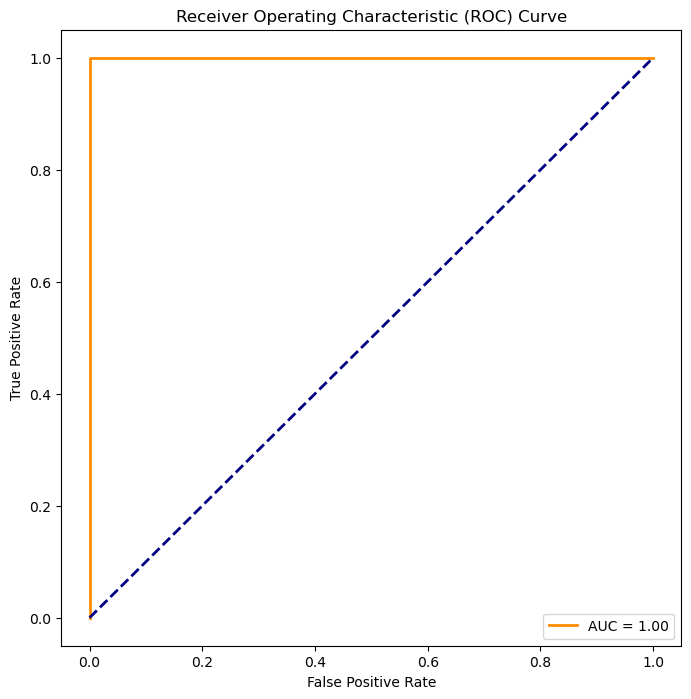

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

32/32 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9570
Accuracy: 95.70%
